<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

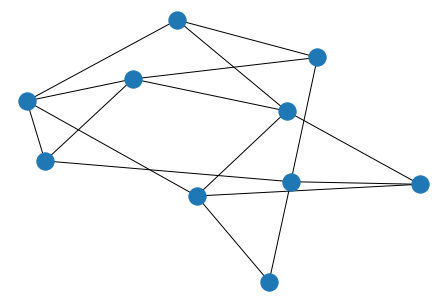

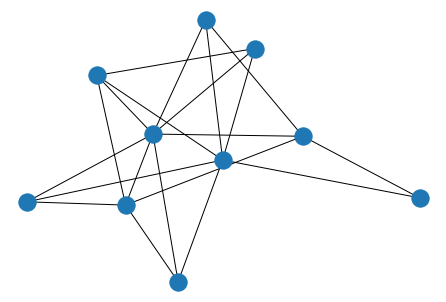

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 10  # 400 Indian Cities
K = 200  # 400000 Agents(people under influence)
#M = 30  # 30 Edges
NN = 10 # 40 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .5 #Probabibilty for Node Connection in random graph
PP = .5
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 1 1 0 0]
 [1 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [0 1 1 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 0 0]]
[[0 1 0 0 1 1 0 1 0 1]
 [1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 1 0 0 1 0]
 [1 0 0 0 0 1 0 0 1 0]
 [1 1 0 1 1 0 1 1 0 1]
 [0 0 0 0 0 1 0 0 1 1]
 [1 0 0 0 0 1 0 0 1 0]
 [0 1 1 1 1 0 1 1 0 0]
 [1 0 1 0 0 1 1 0 0 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: []}
100


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 14: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 15: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 16: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 17: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 18: [{'Viral_load':

In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.randint(0,2)
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {40: 0}, {46: 1, 'V_l': 1}], 1: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 3}, {85: 2}, {112: 2}, {160: 0}, {187: 2}], 2: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 0}, {58: 0}], 3: [{'Viral_load': 0}, {'S': 2}, {'I': 1}, {'R': 1}, {100: 0}, {115: 2}, {159: 0}, {174: 1, 'V_l': 1}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 2}, {'R': 0}, {111: 1, 'V_l': 1}, {178: 1, 'V_l': 1}], 5: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 2}, {92: 0}, {158: 2}, {166: 2}], 6: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 2}, {38: 2}, {71: 0}, {81: 0}, {127: 2}], 7: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {93: 0}, {122: 1, 'V_l': 1}], 8: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {22: 0}, {79: 1, 'V_l': 1}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 1}, {'R': 0}, {83: 1, 'V_l': 1}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 1}, {'R': 0}, {163: 1, 'V_l': 1}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 1}, {'R': 2}, {99: 2}, {142: 2}, {14

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

10
10


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][1])
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][2])
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][3])
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        next = random.choices(neighbors,weights=(80,80,80), k=1)[0]
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(80,80), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(80), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1


                        
                      nextn = random.choice(Agent_next[a_id][8]['Current_nodeN'])
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    print("count_no_movements",count_nomove)
    print("count_movements_firstnode",count_move_first)
    print("count_movements_secondnode",count_move_second)
    print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
Node_n=Node.copy() 
Agent_n=Agent.copy()
for j in range(10):
  Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  print(count)
  print(Node_p)
  print(Node_n)
  print(Agent_p)
  print(Agent_n)

  #print(j)


count_no_movements 68
count_movements_firstnode 62
count_movements_secondnode 70
count_stay_homenode 0
500
{0: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {40: 0}, {46: 1, 'V_l': 1}], 1: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 3}, {85: 2}, {112: 2}, {160: 0}, {187: 2}], 2: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 0}, {58: 0}], 3: [{'Viral_load': 0}, {'S': 2}, {'I': 1}, {'R': 1}, {100: 0}, {115: 2}, {159: 0}, {174: 1, 'V_l': 1}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 2}, {'R': 0}, {111: 1, 'V_l': 1}, {178: 1, 'V_l': 1}], 5: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 2}, {92: 0}, {158: 2}, {166: 2}], 6: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 2}, {38: 2}, {71: 0}, {81: 0}, {127: 2}], 7: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {93: 0}, {122: 1, 'V_l': 1}], 8: [{'Viral_load': 0}, {'S': 1}, {'I': 1}, {'R': 0}, {22: 0}, {79: 1, 'V_l': 1}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 1}, {'R': 0}, {83: 1, 'V_l': 1}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 1}, 